In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [75]:
train_df = pd.read_csv('../training.csv') # split for test and train set is ready
test = pd.read_csv('../test.csv')

In [76]:
y_train = pd.read_csv("../preprocessed_data/y_train.csv")
y = pd.read_csv("../preprocessed_data/y_whole.csv")
y_val  = pd.read_csv("../preprocessed_data/y_val.csv")

In [77]:
X_train = pd.read_csv("../preprocessed_data/X_train.csv")
X_whole = pd.read_csv("../preprocessed_data/X_whole.csv")
X_val  = pd.read_csv("../preprocessed_data/X_val.csv")

In [78]:
X_train.describe()

,VehOdo,VehBCost,WarrantyCost,VehicleAge,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,IsOnlineSale,VehicleAge.1,Year,x0,...,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93
count,5.108800e+04,5.108800e+04,5.108800e+04,5.108800e+04,5.108800e+04,5.108800e+04,51088.000000,51088.000000,51088.000000,51088.000000,...,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000,51088.000000
mean,3.610572e-16,3.248263e-16,1.601878e-16,1.428373e-16,3.116830e-16,-2.381086e-16,0.320095,0.168396,0.347694,0.163815,...,0.077729,0.080900,0.083425,0.089414,0.099006,0.091939,0.073109,0.024233,4.171743,0.518928
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.466517,0.374221,0.476243,0.370112,...,0.267747,0.272684,0.276526,0.285344,0.298673,0.288943,0.260318,0.153772,1.708658,0.499646
min,-4.565513e+00,-3.692302e+00,-1.358614e+00,-2.441556e+00,-2.184296e+00,-2.437993e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.666977e-01,-7.350469e-01,-7.351692e-01,-6.857746e-01,-7.811319e-01,-7.811156e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.242786e-01,-8.504387e-03,-1.832129e-01,-1.005143e-01,-2.868616e-02,-3.726286e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,7.503434e-01,6.641150e-01,5.715707e-01,4.847460e-01,6.653294e-01,6.584200e-01,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
max,3.030490e+00,1.819479e+01,1.033887e+01,2.825787e+00,1.095030e+01,1.094506e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000


# 4. KNN Classifier

KNN classifier requires some scaling to work properly - all variables are scaled

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

c:\Users\tymot\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_val)

In [10]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     21258
           1       0.10      0.43      0.16       637

    accuracy                           0.87     21895
   macro avg       0.54      0.66      0.55     21895
weighted avg       0.96      0.87      0.91     21895



In [11]:
confusion_matrix(y_val, y_pred)

array([[18837,   365],
       [ 2421,   272]], dtype=int64)

# 5. Parameter Tuning

In [121]:
k_values = [i for i in range (5,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    print(f"{k} job done")

5 job done
6 job done
7 job done
8 job done
9 job done
10 job done
11 job done
12 job done
13 job done
14 job done
15 job done
16 job done
17 job done
18 job done
19 job done
20 job done
21 job done
22 job done
23 job done
24 job done
25 job done
26 job done
27 job done
28 job done
29 job done
30 job done


Text(0, 0.5, 'Accuracy Score')

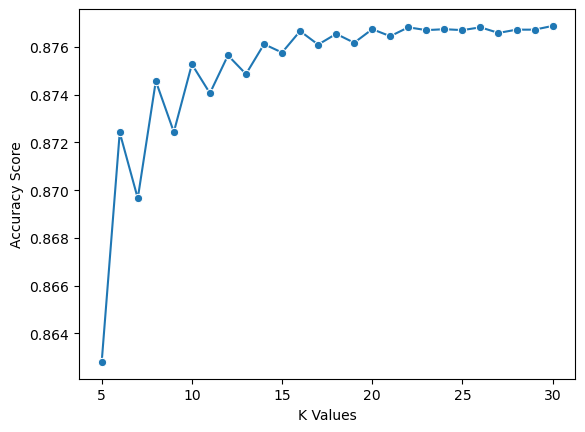

In [122]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [36]:
grid_params = { 'n_neighbors' : [10, 15, 17, 20, 25],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# knn with sparse imput will use brute force algorithm

In [37]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 3, cv=3, n_jobs = -1, scoring = ('balanced_accuracy'))

In [38]:
g_res = gs.fit(X_whole, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [1]:
g_res.best_score_

NameError: name 'g_res' is not defined

In [40]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}


{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}

those are the results - now training with those params

In [12]:
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

c:\Users\tymot\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, weights='distance')

In [13]:
y_pred = knn.predict(X_val)

In [14]:
print(classification_report(y_pred, y_val)) # those results ain't anyhow better

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     21512
           1       0.08      0.55      0.14       383

    accuracy                           0.88     21895
   macro avg       0.53      0.72      0.54     21895
weighted avg       0.98      0.88      0.92     21895



In [15]:
confusion_matrix(y_val, y_pred)

array([[19029,   173],
       [ 2483,   210]], dtype=int64)

# feature importance

In [16]:
from sklearn import metrics
import shap

def gini_roc(y_test, y_pred_proba, tytul):
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    
    plt.plot(fpr,tpr)
    plt.title(tytul)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    roc_auc = metrics.auc(fpr, tpr)
    gini = (2 * roc_auc) - 1

    return gini

def gini_train_val(model, X_train, y_train, X_val, y_val):
    
    y_pred_proba = model.predict_proba(X_train)[::,1]
    gini_train = gini_roc(y_train, y_pred_proba, "ROC Curve for Training Sample")
    print("gini_train: %.4f" % gini_train)
    
    y_pred_proba = model.predict_proba(X_val)[::,1]
    gini_val = gini_roc(y_val, y_pred_proba, "Roc Curve for Validation Sample")
    print("gini_val: %.4f" % gini_val)

    return

def shapley(model, X_train, X_val):
        
    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
    # model = lr
   
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[1])
    
    shap.plots.heatmap(shap_values)
    
    # fig = shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)
    # fig.savefig('testplot.png')
    # fig.plot()
    
    # fig = shap.force_plot(shap_values, X_train)
    # fig.plot()
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")    
    
    

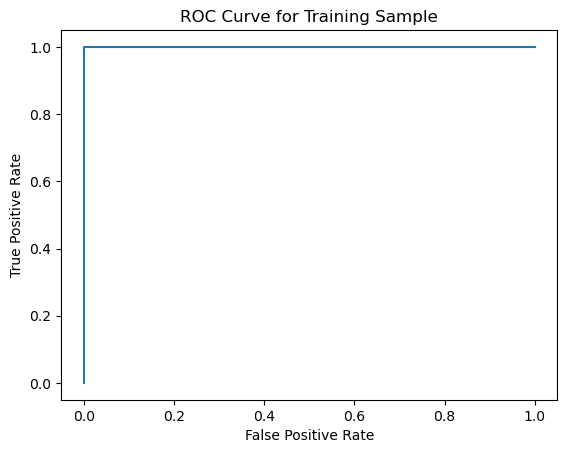

gini_train: 1.0000


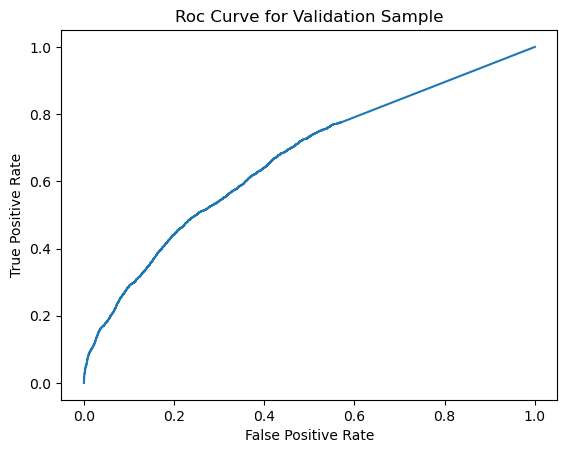

gini_val: 0.3332


In [17]:
gini_train_val(knn, X_train, y_train, X_val, y_val)

no taka troche słaba ta krzywa - nawet bardzo słaba, niewiele gorzej niż dummy

może PCA



In [35]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

31

Text(0, 0.5, 'Total explained variance ratio')

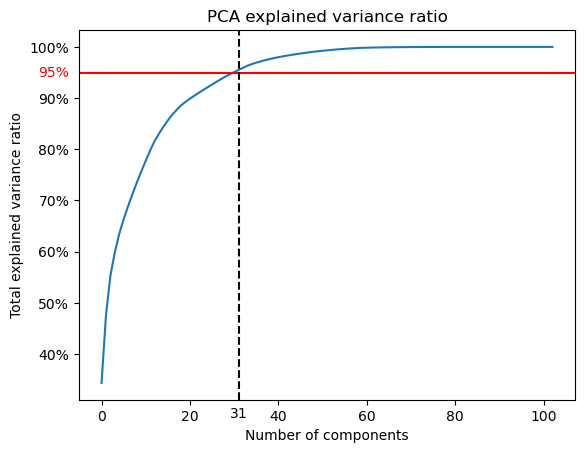

In [70]:
import matplotlib.ticker as mtick
import matplotlib.transforms as transforms
y = list(range(len(cumsum)))
plt.plot(y, cumsum)

plt.title("PCA explained variance ratio")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


plt.gca().axhline(0.95, color="red")

trans_y = transforms.blended_transform_factory(
    plt.gca().get_yticklabels()[0].get_transform(), plt.gca().transData)

trans_x = transforms.blended_transform_factory(
    plt.gca().get_xticklabels()[0].get_transform(), plt.gca().transData)


plt.gca().text(0, 0.95, "95%", color="red", transform=trans_y, 
        ha="right", va="center")


plt.gca().axvline(d, color="black", linestyle="dashed")

plt.gca().text(d, 0.27, d, color="black", transform=trans_x, 
        va="bottom", ha="center")

plt.xlabel("Number of components")
plt.ylabel("Total explained variance ratio")

byc moze mozemy zmniejszyć liczbe wymiarow do 29, tak zeby wariancja wyjasniona nam sie nie dropnela za bardzo

In [91]:
pca = PCA(n_components=d)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_val = pca.transform(X_val)

In [92]:
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=10, weights='distance')
knn.fit(X_reduced_train, y_train)
y_reduced_pred = knn.predict(X_reduced_val)
print(classification_report(y_pred, y_val)) # those results ain't anyhow better neither


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


              precision    recall  f1-score   support

           0       0.99      0.88      0.93     21512
           1       0.08      0.55      0.14       383

    accuracy                           0.88     21895
   macro avg       0.53      0.72      0.54     21895
weighted avg       0.98      0.88      0.92     21895



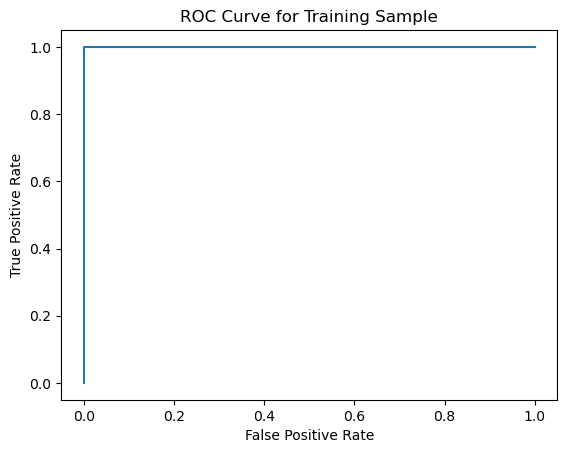

gini_train: 1.0000


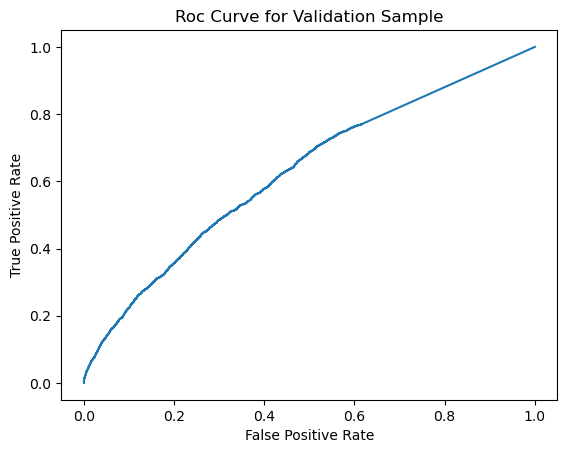

gini_val: 0.2521


In [93]:
gini_train_val(knn, X_reduced_train, y_train, X_reduced_val, y_val)

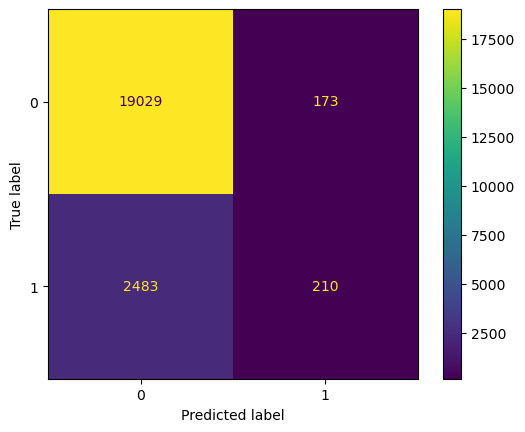

In [90]:
cm = confusion_matrix(y_val, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn.classes_)
disp.plot()

# Final outputs

In [35]:
test = pd.read_csv('../test.csv')

In [36]:
X_test = test.copy()
X_test

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [31]:
X_test  = pd.read_csv("../preprocessed_data/X_test.csv")

In [32]:
y = knn.predict(X_test)

In [34]:
pd.DataFrame(y, columns=["IsBadBuy"]).join(test["RefId"]).to_csv("../out.csv", index=False)